In [14]:
#/usr/bin/python
import sys
sys.path.append('../sample')
from libaictrl1 import *

In [15]:
print 'Hello world, my name is Akihiko Yamaguchi, ID: xxxx'

Hello world, my name is Akihiko Yamaguchi, ID: xxxx


# Section header
## Section subheader
Normal text.

- List item 1
- List item 2


In [19]:
dxl= SetupRobot()

Opened a port: /dev/ttyUSB0
Changed the baud rate to: 57600
Torque disabled
Torque enabled


In [20]:
#MoveToInit(dxl)
MoveToTrg(dxl, 0.2, 1.0)

2100 1968 885
Current position= 1966


In [21]:
MoveToTrg(dxl, 0.8, 0.7)

2100 1577 619
Current position= 1582


In [22]:
data_x= [0.5, 0.6, 0.8, 1.0]
data_y= [0.2, 0.4, 0.7, 0.8]
#f= TrainGPR(data_x, data_y)
f= TrainMLPR(data_x, data_y)
print 'f(0.55)=',f(0.55)

f(0.55)= 0.313423770575


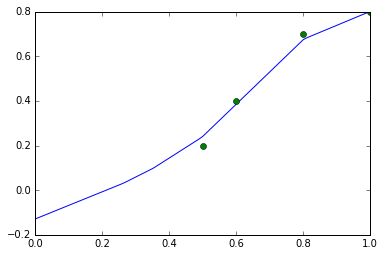

In [23]:
plot= PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot.plot(data_x, data_y, 'o')
plot.show()

In [24]:
#Define an objective function:
def f_error(x):
  y_trg= 0.6
  return (y_trg-f(x))**2

x_opt= FMin(f_error, 0.5, 0.0, 1.0)
print 'Solution:', x_opt, f(x_opt), f_error(x_opt)

initial solution x0= [ 0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=78755, Tue Sep  4 21:56:23 2018)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 1.857951929272156e-06 1.0e+00 4.30e-01  4e-01  4e-01 0:0.0
    2       8 8.789043970742729e-03 1.0e+00 3.24e-01  2e-01  2e-01 0:0.0
    3      12 1.478590474587265e-02 1.0e+00 7.42e-01  6e-01  6e-01 0:0.0
   53     212 1.496319042881632e-14 1.0e+00 2.54e-05  1e-07  1e-07 0:0.1
termination on tolfun=1e-11 (Tue Sep  4 21:56:23 2018)
termination on tolfunhist=1e-12 (Tue Sep  4 21:56:23 2018)
final/bestever f-value = 1.518828e-14 9.391601e-16
mean solution: [ 0.74849004]
std deviation: [  9.98931278e-08]
Solution: 0.748490150923 0.600000030646 9.39160111142e-16


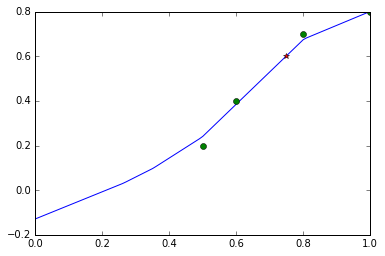

In [25]:
plot= PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot.plot(data_x, data_y, 'o')
plot.plot([x_opt], [f(x_opt)], '*')
plot.show()

In [26]:
MoveToTrg(dxl, 0.2, 1.0)

2100 1968 885
Current position= 1966


In [27]:
x= 0.9
MoveToTrg(dxl, 0.8, x)

2100 1577 796
Current position= 1582


In [39]:
#Repeat above two lines for different x.
#For changing x, choose from: 1. change x manually, 2. use random number generator:
random.random()

0.8801356544622235

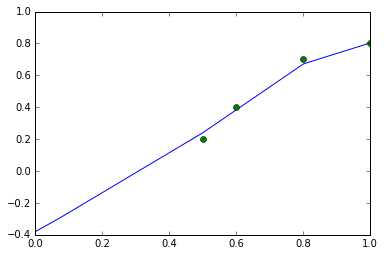

In [47]:
#Construct the data set:
data_x= [0.5, 0.6, 0.8, 1.0]
data_y= [0.2, 0.4, 0.7, 0.8]
#Train a regression model
#f= TrainGPR(data_x, data_y)
f= TrainMLPR(data_x, data_y)
#Plot the function
plot= PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot.plot(data_x, data_y, 'o')
plot.show()

In [49]:
#Control the robot to the target position.
#First, find a control parameter.
def f_error(x):
    y_trg= 0.6
    return (y_trg-f(x))**2

x_opt= FMin(f_error, 0.5, 0.0, 1.0)
print 'Solution:', x_opt, f(x_opt), f_error(x_opt)

initial solution x0= [ 0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=569485, Wed Aug 29 16:12:56 2018)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 6.176084660717836e-07 1.0e+00 5.17e-01  5e-01  5e-01 0:0.0
    2       8 1.125925908440075e-02 1.0e+00 4.17e-01  4e-01  4e-01 0:0.0
    3      12 1.233490213946631e-04 1.0e+00 6.68e-01  7e-01  7e-01 0:0.0
   47     188 2.300371545054569e-16 1.0e+00 8.95e-06  4e-08  4e-08 0:0.1
termination on tolfun=1e-11 (Wed Aug 29 16:12:56 2018)
final/bestever f-value = 2.374339e-16 2.095636e-17
mean solution: [ 0.75044733]
std deviation: [  4.35405410e-08]
Solution: 0.750447313724 2.095635576e-17 0.599999995422


In [26]:
#Execute the solution.
MoveToTrg(dxl, 0.2, 1.0)

2100 1968 885
Current position= 1966


In [27]:
MoveToTrg(dxl, 0.8, , f(x_opt))

2100 1577 648
Current position= 1580
